In [1]:
%matplotlib inline

In [2]:
import pycircos
import matplotlib.pyplot as plt
from Bio import SeqIO 
Garc    = pycircos.Garc
Gcircle = pycircos.Gcircle

In [3]:
record = SeqIO.read("sample_data/NC_000913.gbk", format="genbank")
garc   = Garc(arc_id="NC_000913.3", record=record, interspace=0, linewidth=0, 
              facecolor="#FFFFFF00", raxis_range=(0,10), label_visible=False)

<Figure size 576x576 with 0 Axes>

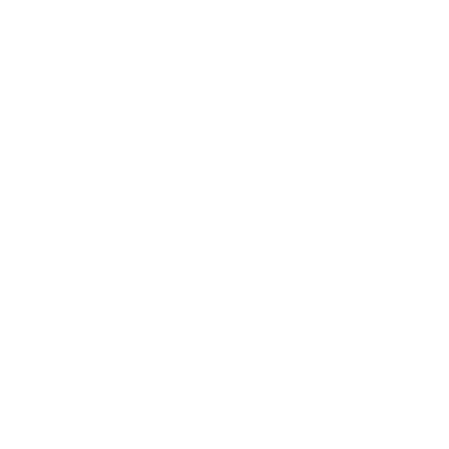

In [4]:
gcircle = Gcircle()
gcircle.add_garc(garc)
gcircle.set_garcs()

In [5]:
#calc CDS density
plus_CDS  = [] 
minus_CDS = [] 
for feat in garc.record.features:
    if feat.type == "CDS" and feat.strand >= 0:
        plus_CDS.append((feat.location.parts[0].start, feat.location.parts[-1].end))
    elif feat.strand == -1:
        minus_CDS.append((feat.location.parts[-1].start, feat.location.parts[0].end))
plus_density  = garc.calc_density(plus_CDS, window_size=10000)
minus_density = garc.calc_density(minus_CDS, window_size=10000)
gcircle.heatmap("NC_000913.3", plus_density,  raxis_range=(700,780), cmap=plt.cm.Reds)
gcircle.heatmap("NC_000913.3", minus_density, raxis_range=(780,860), cmap=plt.cm.Blues)

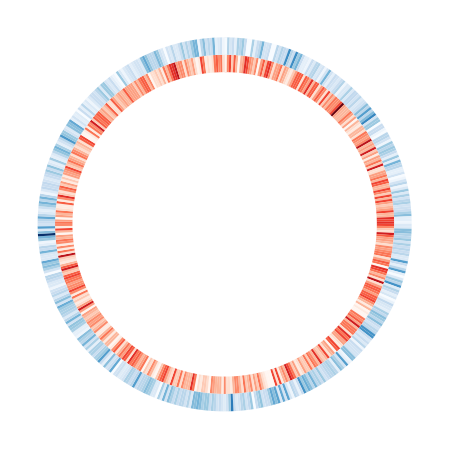

In [6]:
gcircle.figure

In [7]:
#cord plot
import collections
chord_dict = collections.defaultdict(list)
with open("sample_data/segdup.txt","r") as f:
    for line in f:
        line          = line.rstrip().split("\t")
        chord_dict[line[0]].append((line[1], int(line[2]), int(line[3]), 700)) 
        
for key in chord_dict:
    gcircle.chord_plot(chord_dict[key][0], chord_dict[key][1], facecolor="#ff8c0080")

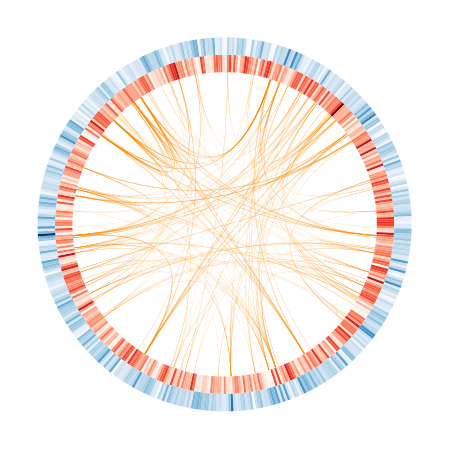

In [8]:
gcircle.figure